In [1]:
from code_.preprocessing.preprocess_sentences import prepare_sentences
from code_.vectorization.Doc2Vec import Doc2Vec_Model
from code_.clusterization.MBKMeans import MBKMeans_Clustering
from code_.clusterization.DBSCAN import DBSCAN_Clustering

import seaborn as sns
sns.set_style("whitegrid")


In [2]:
sentences, content = prepare_sentences(
    path_to_preprocessed_dataset="src/preprocessed_dataset.csv", path_to_dataset="src/dataset.csv")


In [3]:
d2v_model = Doc2Vec_Model(sentences=sentences)


In [4]:
d2v_mbkmeans = MBKMeans_Clustering(model=d2v_model)

d2v_dbscan = DBSCAN_Clustering(model=d2v_model)


In [5]:
d2v_mbkmeans.model.most_similar(positive=[d2v_mbkmeans.centers_[0]])


[('подлец', 0.20835110545158386),
 ('выпереться', 0.20695847272872925),
 ('неприлично', 0.20417875051498413),
 ('злой', 0.201222226023674),
 ('принемаять', 0.20086346566677094),
 ('плясать', 0.20081406831741333),
 ('ui', 0.19418971240520477),
 ('напряжный', 0.19229859113693237),
 ('моментална', 0.19167381525039673),
 ('вразум', 0.19030724465847015)]

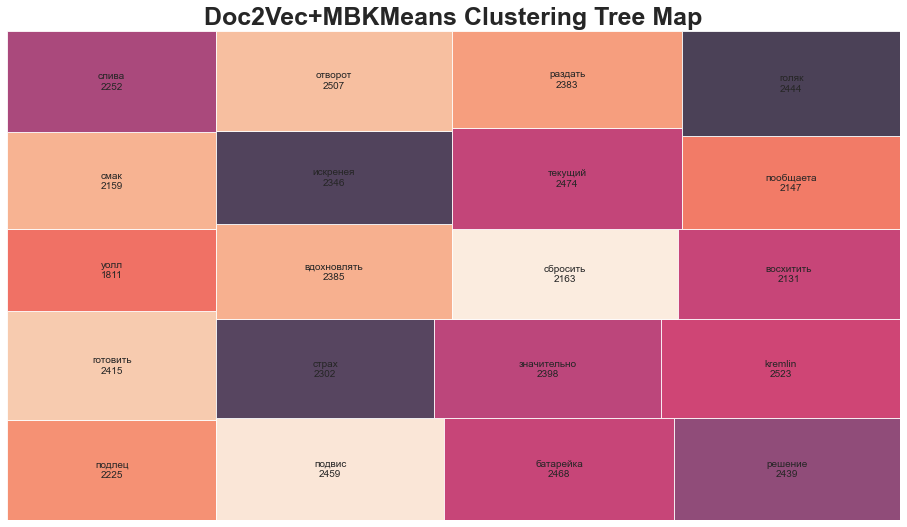

In [6]:
d2v_mbkmeans.show_as_TreeMap()

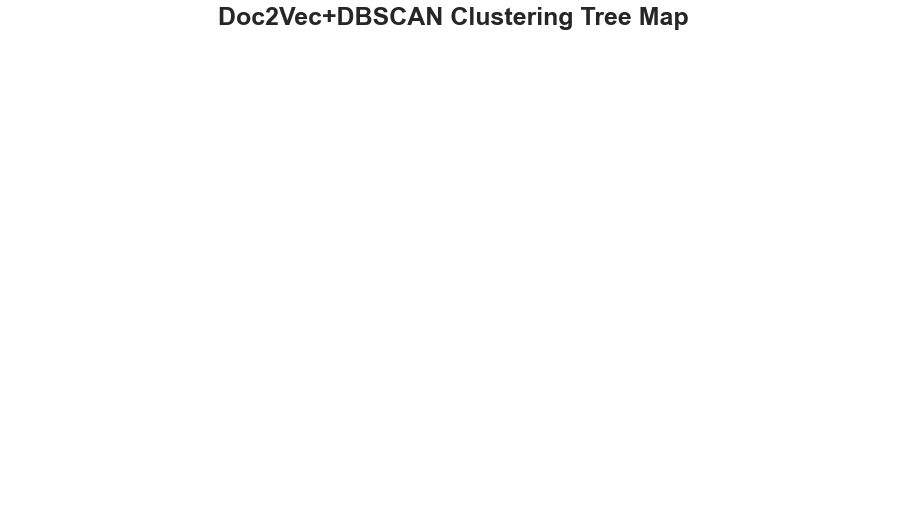

In [7]:
d2v_dbscan.show_as_TreeMap()

In [8]:
print(f'intercluster_distance for D2V+MBKMeans = %.3f' % d2v_mbkmeans.intercluster_distance())
print(f'intercluster_distance for D2V+DBSCAN = %.3f' % d2v_dbscan.intercluster_distance())

intercluster_distance for D2V+MBKMeans = 33.364
intercluster_distance for D2V+DBSCAN = 0.000


In [9]:
print(f'silhouette_score for D2V+MBKMeans = {d2v_mbkmeans.silhouette_score()}')
print(f'silhouette_score for D2V+DBSCAN = {d2v_dbscan.silhouette_score()}')

silhouette_score for D2V+MBKMeans = 0.0018960764864459634


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)